In [16]:
import tensorflow as tf

from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4
from IPython.display import Image

import matplotlib.pyplot as plt
from utils import *
import os

HEIGHT, WIDTH = (640, 960)

In [20]:
ROOT_DIR = get_git_root(os.getcwd())

In [38]:
path = os.path.join(ROOT_DIR, 'videos', 'a1', 'output_00046.jpg')
image = tf.io.read_file(path)
image = tf.image.decode_image(image)
# image = tf.image.resize(image, (HEIGHT, WIDTH))
image = tf.image.resize_with_crop_or_pad(image, HEIGHT, WIDTH)
image = tf.expand_dims(tf.cast(image, tf.float32), axis=0) / 255.0

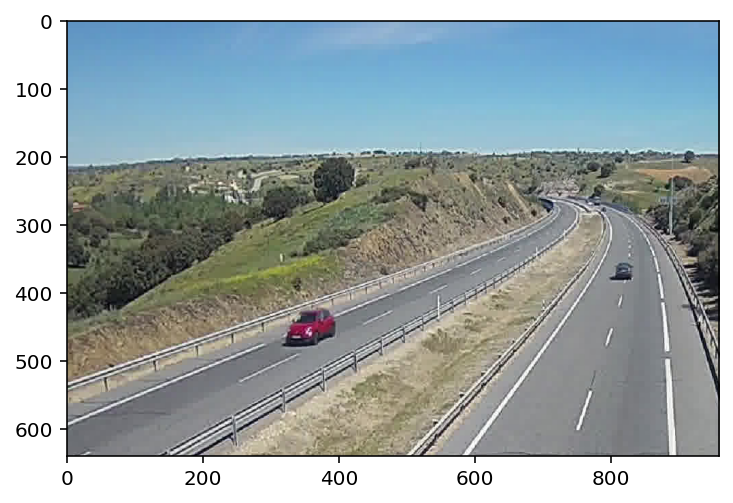

In [41]:
plt.imshow(image[0])

In [21]:
model = YOLOv4(
    input_shape=(HEIGHT, WIDTH, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

weights_path = os.path.join(ROOT_DIR, 'models', 'yolov4', 'yolov4.h5')
model.load_weights(weights_path)
model.summary()

Model: "YOLOv4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 640, 960, 3) 0                                            
__________________________________________________________________________________________________
CSPDarknet53 (Functional)       [(None, 20, 30, 1024 26652512    input_8[0][0]                    
__________________________________________________________________________________________________
YOLOv4_neck (Functional)        [(None, 20, 30, 512) 15857152    CSPDarknet53[0][0]               
                                                                 CSPDarknet53[0][1]               
                                                                 CSPDarknet53[0][2]               
_____________________________________________________________________________________________

In [42]:
boxes, scores, classes, valid_detections = model.predict(image)

In [22]:
# COCO classes
CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# CLASSES = ['person', 'car']

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [36]:
%config InlineBackend.figure_format = 'retina'

def plot_results(pil_img, boxes, scores, classes, save_path=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for (xmin, ymin, xmax, ymax), score, cl in zip(boxes.tolist(), scores.tolist(), classes.tolist()):
        if score > 0:
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=COLORS[cl % 6], linewidth=3))
            text = f'{CLASSES[cl]}: {score:0.2f}'
            ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    if not save_path:
        plt.show()
    else:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.0, dpi=84.8057)

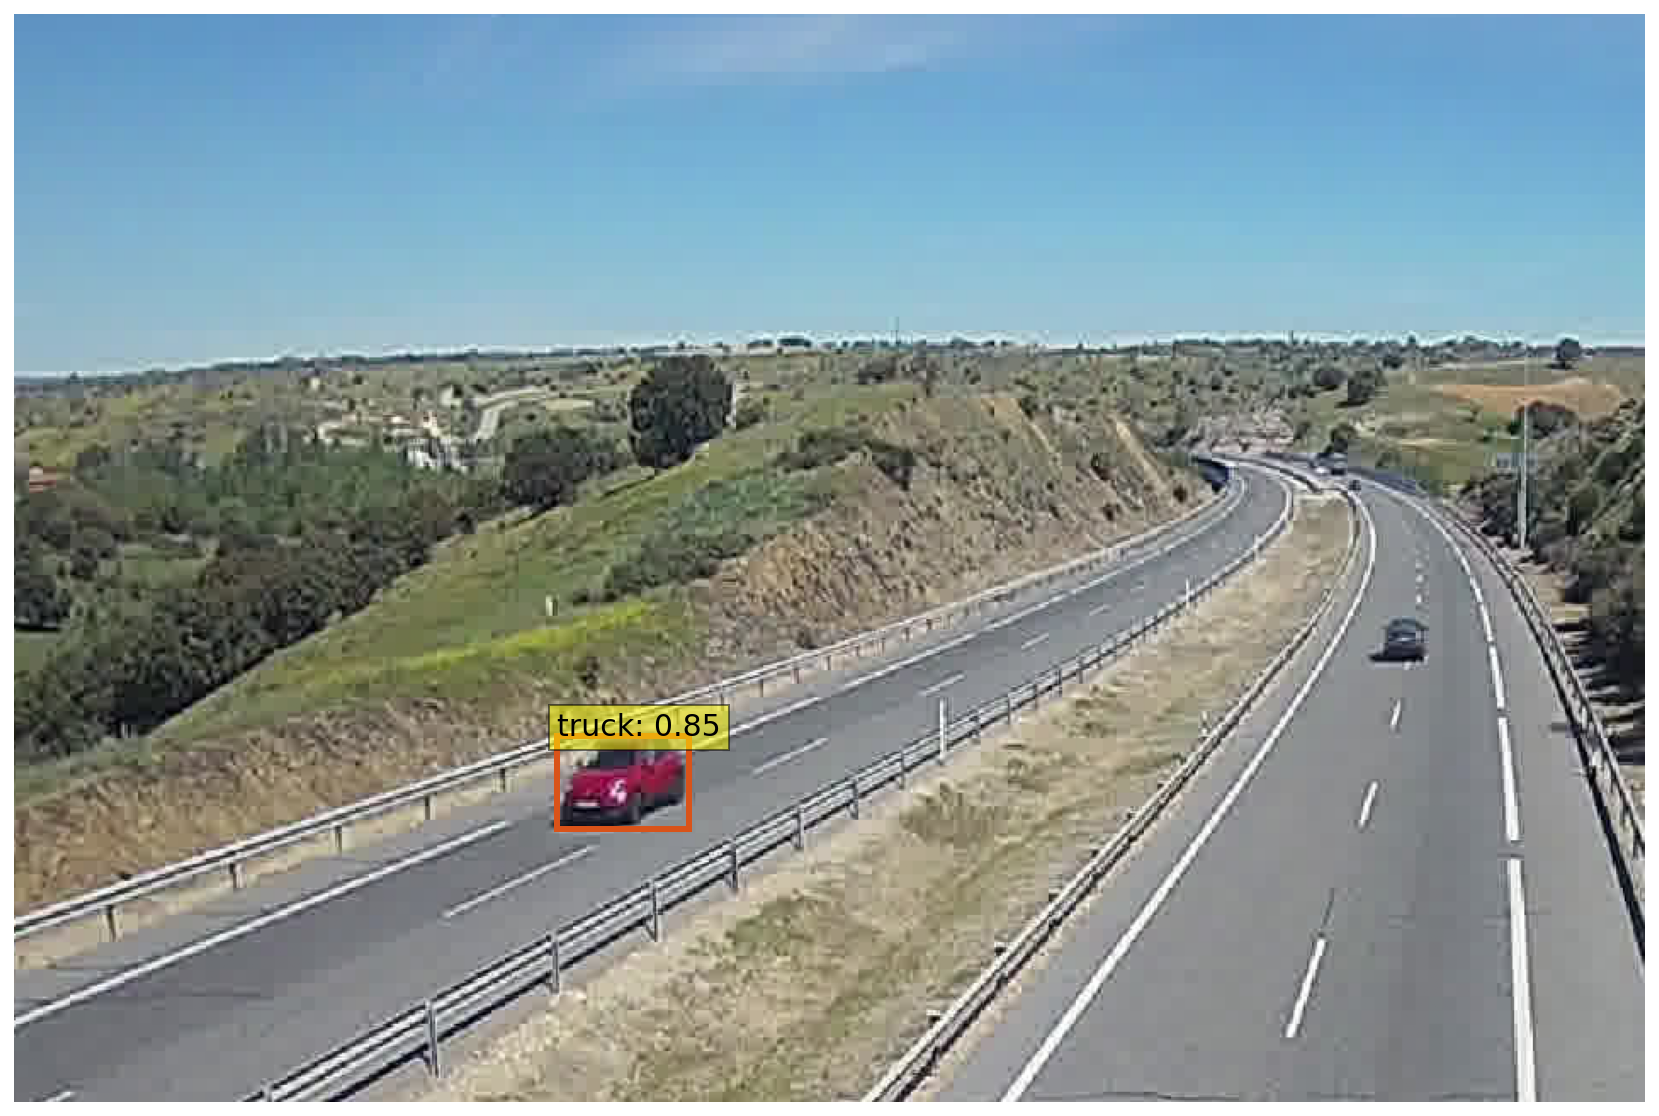

In [43]:
plot_results(
    image[0],
    boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT],
    scores[0],
    classes[0].astype(int),
)

In [40]:
images = os.listdir(os.path.join(ROOT_DIR, 'videos', 'a1'))
images.sort()

n = len(images)
i = 0
for each_image in images:
    path = os.path.join(ROOT_DIR, 'videos', 'a1', each_image)
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image)
#     image = tf.image.resize(image, (HEIGHT, WIDTH))
    image = tf.image.resize_with_crop_or_pad(image, HEIGHT, WIDTH)
    image = tf.expand_dims(tf.cast(image, tf.float32), axis=0) / 255.0
    boxes, scores, classes, valid_detections = model.predict(image)
    plot_results(
        image[0],
        boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT],
        scores[0],
        classes[0].astype(int),
        os.path.join(ROOT_DIR, 'videos', 'a1_output', each_image)
    )
    plt.close('all')
    i += 1
    print('{} of {} images'.format(i, n))

1 of 267 images
2 of 267 images
3 of 267 images
4 of 267 images
5 of 267 images
6 of 267 images
7 of 267 images
8 of 267 images
9 of 267 images
10 of 267 images
11 of 267 images
12 of 267 images
13 of 267 images
14 of 267 images
15 of 267 images
16 of 267 images
17 of 267 images
18 of 267 images
19 of 267 images
20 of 267 images
21 of 267 images
22 of 267 images
23 of 267 images
24 of 267 images
25 of 267 images
26 of 267 images
27 of 267 images
28 of 267 images
29 of 267 images
30 of 267 images
31 of 267 images
32 of 267 images
33 of 267 images
34 of 267 images
35 of 267 images
36 of 267 images
37 of 267 images
38 of 267 images
39 of 267 images
40 of 267 images
41 of 267 images
42 of 267 images
43 of 267 images
44 of 267 images
45 of 267 images
46 of 267 images
47 of 267 images
48 of 267 images
49 of 267 images
50 of 267 images
51 of 267 images
52 of 267 images
53 of 267 images
54 of 267 images
55 of 267 images
56 of 267 images
57 of 267 images
58 of 267 images
59 of 267 images
60 of 